# Assignment 2

**Objective:**  
Create and visualize three different types of graphs using the datasets provided:  
- **bar_assignment.csv**  
- **sankey_assignment.csv**  
- **network_assignment.csv**

**General Instructions:**  
Use the same font and font size for all graphs. Ensure that you adhere to the plot specifications and color schemes provided for each graph.

---

## Tasks

### A. Bar Graph:
Create a **horizontal stacked bar chart**.
- **Transform data:**
  - Convert `1` into “Yes” and `0` into “No”.
- **Plot Specification:**  
  - Follow the instructions to display the bar chart as a horizontal stacked bar.

### B. Sankey Diagram:
Create a **Sankey Diagram** that connects the following:
- Source Nodes: ('PS', 'OMP', 'CNP', 'NRP', 'NMCCC', 'PEC', 'NCDM', 'RGS')
- Target Nodes: ('Reg', 'Aca', 'Oth')

Follow the **Path Specifications** to properly connect the nodes in the diagram.

### C. Network Graph:
Create a **network graph** with specific node placements:
- **Pentagram Structure:**  
  Nodes `D`, `F`, `I`, `N`, `S` should form a pentagram at the center of the graph. Ensure they show connections to each other.
- **Outer Nodes:**  
  Other nodes should be positioned outside the pentagram but still show connections to other nodes.
- **Node Colors:**
  - **Blue:** `['D', 'F', 'I', 'N', 'S']`
  - **Green:** `['BIH', 'GEO', 'ISR', 'MNE', 'SRB', 'CHE', 'TUR', 'UKR', 'GBR', 'AUS', 'HKG', 'USA']`
  - **Yellow:** `['AUT', 'BEL', 'BGR', 'HRV', 'CZE', 'EST', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 'ITA', 'LVA', 'LUX', 'NLD', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP']`

### Final Task:
1. **Collate the Graphs:**  
   Combine all three graphs into a single graph that is optimized for printing.  
   - This final graph should be visible when copy-pasted into a long bond paper.

---

## Deliverables:

1. **Code**  
   - Provide the code for all three tasks.

2. **Individual Graphs:**
   - PNG files for each graph (Bar Graph, Sankey Diagram, Network Graph).

3. **Collated Graph:**
   - PNG file of the collated graphs.

4. **Sample Collated File:**
   - A sample of the collated file pasted into a document and saved as a `.pdf`.

5. **GitHub Submission:**
   - Push all files to your GitHub account.



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import plotly.graph_objects as go
from matplotlib.gridspec import GridSpec

In [50]:
# Load datasets
bar_df = pd.read_csv("bar_assignment.csv")
sankey_df = pd.read_csv("sankey_assignment.csv")
network_df = pd.read_csv("network_assignment.csv")


<span style="font-size: 25px;">I. BAR GRAPH</span>


In [103]:
bar_df.head()

,LABEL,COUNT,COUNT_YN
0,D,1,Yes
1,D,1,Yes
2,D,0,No
3,D,1,Yes
4,F,1,Yes


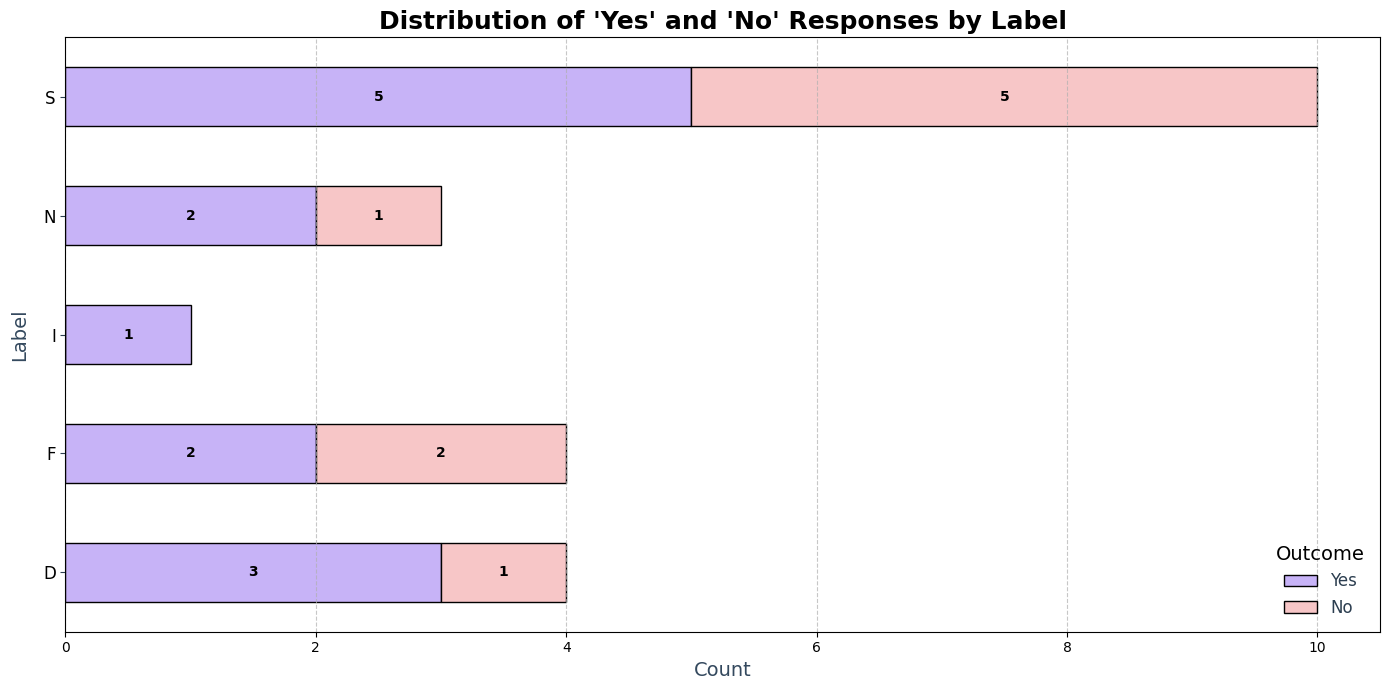

In [151]:
# Ensure COUNT is mapped correctly
bar_df['COUNT_YN'] = bar_df['COUNT'].map({0: 'No', 1: 'Yes'})

# Ensure LABEL is a string and drop NaNs
bar_df = bar_df.dropna(subset=['LABEL'])
bar_df['LABEL'] = bar_df['LABEL'].astype(str)

# Create crosstab to count occurrences of 'Yes' and 'No' per LABEL
crosstab = pd.crosstab(bar_df['LABEL'], bar_df['COUNT_YN'])

# Ensure "Yes" and "No" columns exist, even if one is missing
for col in ['Yes', 'No']: 
    if col not in crosstab.columns:
        crosstab[col] = 0  # Add missing column with zeros

# Convert to numeric to avoid plotting issues
crosstab = crosstab.astype(int)

# Check if crosstab is empty
if crosstab.empty:
    print("Error: Crosstab is empty after processing! No data to plot.")
else:
    # Set style
    plt.style.use("seaborn-v0_8-muted")
    purple = "#C7B3F7"  
    pink = "#F7C6C7" 

    # Plot the horizontal stacked bar chart
    fig, ax = plt.subplots(figsize=(14, 7))

    bars = crosstab[['Yes', 'No']].plot( 
        kind='barh',
        stacked=True, 
        color=[purple, pink],  
        edgecolor='black',
        ax=ax
    )

    # Align labels properly within their respective sections
    for i, (yes, no) in enumerate(zip(crosstab["Yes"], crosstab["No"])):
        total = yes + no

        # Position "Yes" labels inside the purple section (left-aligned)
        if yes > 0:
            ax.text(yes / 2, i, str(yes), ha='center', va='center', 
                    fontsize=10, fontweight='bold', color='black')

        # Position "No" labels inside the pink section (right-aligned)
        if no > 0:
            ax.text(yes + (no / 2), i, str(no), ha='center', va='center', 
                    fontsize=10, fontweight='bold', color='black')

    # Set title and labels
    ax.set_title("Distribution of 'Yes' and 'No' Responses by Label", 
                 loc='center', fontsize=18, fontweight='bold', color='black')
    ax.set_xlabel('Count', fontsize=14, color='#34495E')
    ax.set_ylabel('Label', fontsize=14, labelpad=10, color='#34495E')

    # Adjust y-axis tick labels
    ax.tick_params(axis='y', labelsize=12, color='#2C3E50')

    # Add subtle grid lines
    ax.grid(axis='x', linestyle='--', alpha=0.7)

    #Legend 
    legend = ax.legend(title="Outcome", title_fontsize=14, frameon=False, loc="lower right", fontsize=12)
    plt.setp(legend.get_texts(), color="#2C3E50")

    # Tight layout
    plt.tight_layout()

    # Show plot
    plt.show()



<span style="font-size: 25px;">II. SANKEY GRAPH</span>


In [104]:
sankey_df.head()

,LABEL,PS,OMP,CNP,NRP,NMCCC,PEC,NCDM,RGS,Reg,Aca,Oth
0,S,3,4,1,1,0,0,1,1,2,7,1
1,F,0,1,2,1,1,0,0,1,2,2,0
2,D,1,1,2,0,0,0,1,1,1,3,1
3,N,1,1,1,1,0,1,1,0,2,2,1
4,I,0,1,0,0,0,0,0,0,0,1,0


<span style="font-size: 25px;">III. NETWORK GRAPH</span>

In [105]:
network_df.head()

,LABELS,N,D,F,I,S,AUT,BEL,BIH,BGR,...,SVK,SVN,ESP,CHE,TUR,UKR,GBR,AUS,HKG,ASU
0,D,3,0,3,1,3,0,0,0,0,...,0,0,1,0,0,0,2,0,0,1
1,F,1,2,0,1,1,0,1,0,0,...,1,1,2,1,0,0,2,0,0,0
2,I,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,N,0,2,2,1,2,0,0,0,0,...,0,0,1,0,0,0,2,1,0,1
4,S,5,4,3,3,0,2,2,2,2,...,0,0,2,2,2,2,3,1,1,1


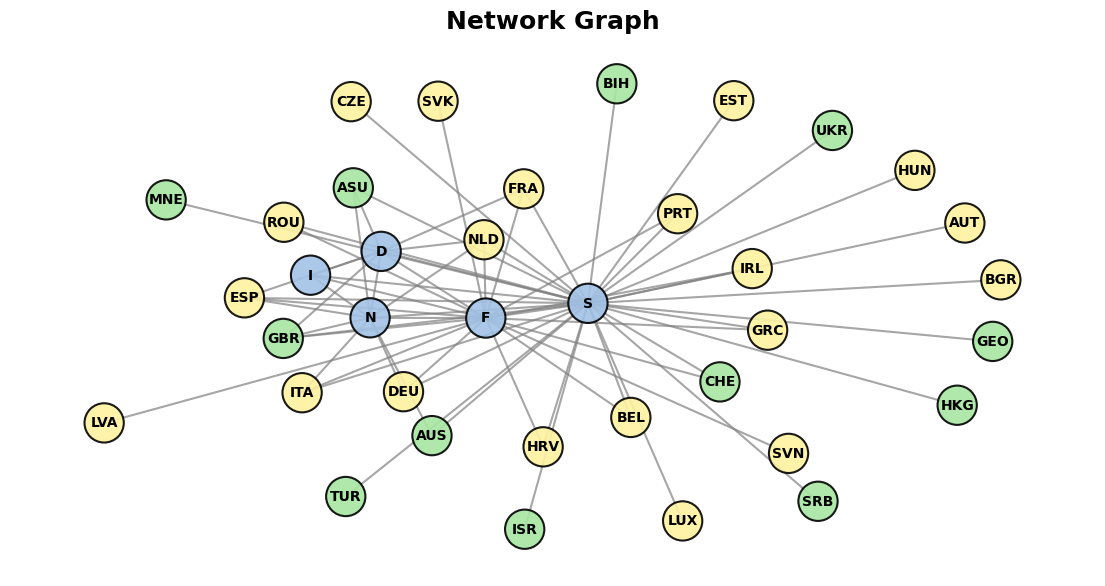

In [152]:
# Function to get the distance between nodes
def get_dist(src, tgt):
    global network_df
    return network_df.loc[network_df['LABELS'] == src, tgt].values[0]

# Function to add edges between nodes based on distance
def add_edges(edge_list, src_grp, tgt_grp):
    for src in src_grp:
        for tgt in tgt_grp:
            if get_dist(src, tgt) > 0:
                edge_list.append((src, tgt))

# Define node groups
blue_grp = ['D', 'F', 'I', 'N', 'S']
green_grp = ['BIH', 'GEO', 'ISR', 'MNE', 'SRB', 'CHE', 'TUR', 'UKR', 'GBR', 'AUS', 'HKG', 'ASU']
yellow_grp = ['AUT', 'BEL', 'BGR', 'HRV', 'CZE', 'EST', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 'ITA', 
              'LVA', 'LUX', 'NLD', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP']

nodes = blue_grp + green_grp + yellow_grp

# Create edge lists
blue_blue, blue_green, blue_yellow = [], [], []

add_edges(blue_blue, blue_grp, blue_grp)
add_edges(blue_green, blue_grp, green_grp)
add_edges(blue_yellow, blue_grp, yellow_grp)

edges = blue_blue + blue_green + blue_yellow

# Create the graph
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

# Define colors
blue, green, yellow = "#A2C2E6", "#A8E6A3", "#FFF2A1"

colors = [blue if n in blue_grp else green if n in green_grp else yellow for n in nodes]

# Position nodes
pos = nx.spring_layout(G, seed=42)

# Create figure
plt.figure(figsize=(14, 7))

# Draw edges
nx.draw_networkx_edges(G, pos, edge_color="gray", width=1.5, alpha=0.7)

# Draw nodes
size = 800  
nx.draw_networkx_nodes(G, pos, 
                       node_color=colors, 
                       edgecolors="black", 
                       linewidths=1.5, 
                       node_size=size, 
                       alpha=0.9)

# Draw labels inside nodes
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")

plt.title("Network Graph", fontsize=18, fontweight="bold", color="black")
plt.axis("off")
plt.show()

